<img src="https://drive.google.com/uc?id=1E_GYlzeV8zomWYNBpQk0i00XcZjhoy3S" width="100"/>

#DSGT Bootcamp Week 2: Exploratory Data Analysis

# Learning Objectives

1. Learn Pandas (data manipulation library)
2. Filter data using Pandas
3. Understand how to initially view a dataset
4. Introduction to statistical analysis and data visualization





# Accessing the Titanic Dataset

#### To speed up the data download process, we've placed the data in this Google Folder where everyone will be making their notebooks. Let's go over the steps needed to import data into Google Colab.

**PLEASE READ THE STEPS!!!**
1. Go to your Google Drive (drive.google.com) and check **"Shared with me"**
2. Search for a folder named **"Spring 2021 Bootcamp Material"**
3. Enter the **Spring 2021 Bootcamp Material** folder, click the name of the folder (**Spring 2021 Bootcamp Material**) on the bar at the top of the folder to create a drop-down and select **"Add shortcut to Drive"**
4. Select **"My Drive"** and hit **"Add Shortcut"**
5. Enter the **Spring 2021 Bootcamp Material** folder you just made, and navigate to the **"Participants"** subfolder
6. Make a new folder within Participants in the format **"FirstName LastName"**.
7. Return to Google Colab.
8. Go to **"File -> Save a copy in Drive"**. Rename the file to **"firstname-lastname-week2.ipynb"**. It will be placed into a folder named **"Colab Notebooks"** in your Google Drive.
9. Move **"firstname-lastname-week2.ipynb"** to your **Participant** folder within Google Drive.
10. Return to Google Colab.
11. Hit the folder image on the left bar to expand the file system.
12. Hit **"Mount Drive"** to allow Colab to access your files. Click the link and copy the code provided into the textbox and hit Enter.

# Introduction to Pandas

Pandas is a data manipulation library. Let's import it so we can use its predefined functions and go through some basic commands


In [ ]:
import pandas as pd #this imports pandas as pd to shorten function calls
print(pd.__version__)

1.1.5


# Mounting the Drive

To access our data, we need to change our directory to where the data is . Use a combination of %cd, %ls, and %pwd to move your working directory to 
#../Participants/Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd

'/content/drive/.shortcut-targets-by-id/14ismWEVuvc7ESkob1ObgVgyn9LoOSa3h/Spring 2021 Bootcamp Material/Participants/Data'

In [ ]:
%ls

cleanTitanic.csv        cleanWIC.csv      titanic_train.csv
cleanTitanic_train.csv  titanic_test.csv  WICData.csv


In [ ]:
%cd 'drive'

[Errno 2] No such file or directory: 'drive'
/content/drive/.shortcut-targets-by-id/14ismWEVuvc7ESkob1ObgVgyn9LoOSa3h/Spring 2021 Bootcamp Material/Participants/Data


In [ ]:
%ls

cleanTitanic.csv        cleanWIC.csv      titanic_train.csv
cleanTitanic_train.csv  titanic_test.csv  WICData.csv


In [ ]:
#Switch your  directory to where our data is located! Add "Spring 2021 Bootcamp Material" folder as shortcut to drive at the MyDrive level
%cd 'MyDrive/Spring 2021 Bootcamp Material/Participants/Data'

[Errno 2] No such file or directory: 'MyDrive/Spring 2021 Bootcamp Material/Participants/Data'
/content/drive/.shortcut-targets-by-id/14ismWEVuvc7ESkob1ObgVgyn9LoOSa3h/Spring 2021 Bootcamp Material/Participants/Data


In [ ]:
%ls

cleanTitanic.csv        cleanWIC.csv      titanic_train.csv
cleanTitanic_train.csv  titanic_test.csv  WICData.csv


#Introduction to Dataframes
Pandas' core element is a dataframe -- effectively a faster version of a spreadsheet stored in memory.

Using dataframes, we can explore data rapidly and effectively with prebuilt functions.

Let's start by loading in a dataframe from the CSV file 'titanic_train.csv' in the folder we moved to.

A CSV (comma-separated values) file is exactly what it sounds like. The Pandas dataframe lets us see what they look like in an appealing format.



In [ ]:
df = pd.read_csv('titanic_train.csv')

So what is this dataframe df? 

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


As shown above, there are 891 rows or data points and 12 columns or features that describe the data.

A feature is just an attribute of the data. It can be categorical/qualitative (ex: sex) or quantitative (ex: age).



# Data Preprocessing

Why do we need data preprocessing? Well, your data will rarely be perfecly usable right away. 

Potential issues include:

1) Flaws in the data itself (missing values, poor formatting, etc.)

2) Some data may be irrelevant or redundant

3) You may want to add multiple data sets together

## Data Filtering

In [ ]:
minidf = df[['PassengerId','Sex', 'Age', 'SibSp', 'Parch']] #Isolate these features in the df
minidf = minidf[0:7] #look at the first seven rows for these features
minidf

,PassengerId,Sex,Age,SibSp,Parch
0,1,male,22.0,1,0
1,2,female,38.0,1,0
2,3,female,26.0,0,0
3,4,female,35.0,1,0
4,5,male,35.0,0,0
5,6,male,NaN,0,0
6,7,male,54.0,0,0


Now, we have a smaller dataframe that is much easier to read, though with less data to analyze. This can be used to concentrate on certain features or locations within the set to potentially identify trends. 

We can isolate certain rows or columns by value using a few different techniques such as .where(), .loc, .iloc, and basic conditionals as can be seen in the snippet below

In [ ]:
df[df['Sex'] == 'male']
#What if I wanted everyone that did not survive?

#What if I wanted all passengers aged 20 and older? 

KeyError: ignored

## Removing rows/columns

Let's check if we are missing any values in our dataste with the isnull().sum() method.

In [ ]:
df.isnull().sum() #For every column, find the number of empty data points 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that the majority of our missing data is in the age and cabin columns, so let's drop those columns along with other features we don't care about.

In [ ]:
df = df.drop(['Cabin', 'Age', 'PassengerId', 'Ticket'], axis = 1)
df

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,0,0,30.0000,C


Notice that this dataset does not include age or cabin anymore.

## Filling Empty Values

Now another problem you may encounter is empty values in your data. In this data, there are two blank entries in the "Embarked" feature. There are a few ways to deal with blank and invalid(Nan) entries. One option for numerical data would be to insert the entire column average into the missing data. However, since this is a categorical feature, it would be best to remove the entire data point with the missing value.

In [ ]:
df = df.dropna(axis = 0, how = 'any')
df
#df.isnull().sum()

NameError: ignored

There are a ton of other ways you can preprocess data! More advanced topics include data cleaning and transformation to remove outliers and standardize data and encoding categorical data into numerical values.

## Exporting Cleaned Data

Whenever you finish preprocessing your data, you need to export it as a new file so you can reference it later.

In [ ]:
#import library needed for file export
from google.colab import files
df.to_csv('cleanTitanic_train.csv')

files.download('cleanTitanic_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('cleanTitanic_train.csv') #open the cleaned dataset to make sure it works
df

,Unnamed: 0,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,2,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S
4,4,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
884,886,0,2,"Montvila, Rev. Juozas",male,0,0,13.0000,S
885,887,1,1,"Graham, Miss. Margaret Edith",female,0,0,30.0000,S
886,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,23.4500,S
887,889,1,1,"Behr, Mr. Karl Howell",male,0,0,30.0000,C


#Imports


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

from sklearn.model_selection import train_test_split

# Understanding Data Distributions (Normal Distribution)


Normal Distribution is by far the most important distribution when it comes to probability distribution in statistics because it mimics natural phenomena very well. Blood pressure, IQ, Height, Weight, etc. Normal Distribution is represented by a Gaussian curve which is show in the graphic below. We usually want a dataset of at least thirty entries though the larger the better.

The graphic entails the following (This is just an example, other normal distributions follow similar pattern, but not exact numbers).

1.) If I have a value that is in between the mean +- one standard deviation, my value belongs in the group representing 68.27% of the population

2.) If I have a value that is in between the mean +- two standard deviation, my value belongs in the group representing 95.45% of the population

3.) If I have a value that is in between the mean +- three standard deviation, my value belongs in the group representing 99.73% of the population

<img src="https://miro.medium.com/max/1400/1*IZ2II2HYKeoMrdLU5jW6Dw.png" width=600px>

Now it's time to look at why this is important to us data scientist. As data scientist, we are to interpret the data given by our environment, so of course we want our data to be as unbiased as possible. We simply want to capture our environment and from there conduct our own analyses.

The following theorem helps us understand better capturing data.



#Understanding Statistical Analysis (Central Limit Theorem)

The theorem states a dataset will approach a normal distribution as more and more data is randomly collected. There are mathematics to prove this, but this is as far as you need to know conceptually.

Example: This graphic depicts the probability distribution of rolling dice. As we roll the dice more and more, we find the distribution to to represent something closert to a normal distribution.

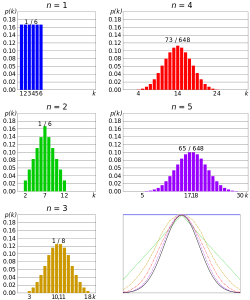

If I roll the dice once, I am equally likely to get 1,2,3,4,5,6. However, as I roll the dice more and more, I can expect my values to become closer and closer to 3.5, the expected value/mean.

#Demonstration

It's time to take a look at this ourselves! We are going to be splitting up our data into smaller ascending groups and graphing each group out. As we begin to graph larger datasets, the graph distribution will mimic a normal distribution more.

In [ ]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


I want to analyze the age column. However, I there were a lot of null values last time I checked, and I definitely don't want those.

In [ ]:
X = df['Age'].dropna()

In [ ]:
len(X)

714

Definitely smaller compared to 418!

In [ ]:
X1 = X
y = X
X1_train, X1_test, y_train, y_test = train_test_split(X1,y,test_size=.10, random_state=101)

In [ ]:
X2 = X
y = X
X2_train, X2_test, y_train, y_test = train_test_split(X2,y,test_size=.33, random_state=101)

While this method is traditionally used for other machine learning practices, it will suffice for our purposes. It splits our data, and I want to graph out the different groups it splits.

Only focus on the X. 

X1_test represents 10% of the data

X2_test represents 33%

X2_train represents 66%

X1_train represents 80%

X represents 100% of the data.

In [ ]:
print(len(X1_test))
print(len(X2_test))
print(len(X2_train))
print(len(X1_train))
print(len(X))

72
236
478
642
714


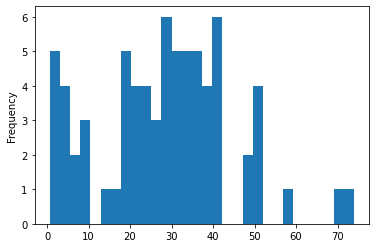

In [ ]:
X1_test.plot(kind='hist',bins=30)

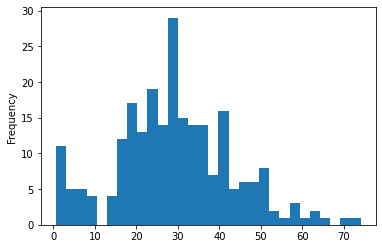

In [ ]:
X2_test.plot(kind='hist',bins=30)

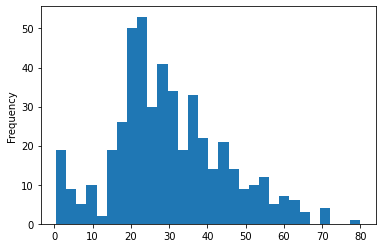

In [ ]:
X2_train.plot(kind='hist',bins=30)

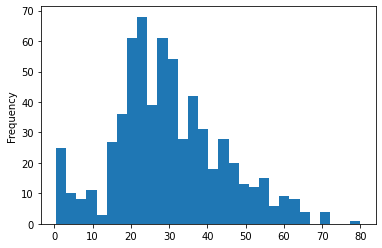

In [ ]:
X1_train.plot(kind='hist',bins=30)

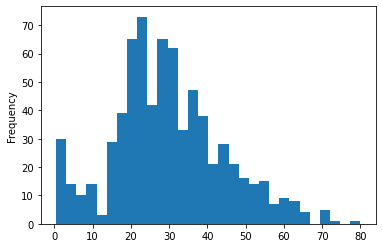

In [ ]:
X.plot(kind='hist',bins=30)

The first two were really rough and the last couple started to shape up into a normal distribution, good to see Central Limit Theorem at work!

#Data Visualization

As they say, a picture is worth a thousand words! It's time to visualize our data. 

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


This is all about us, the data scientist! We are curious and wish to see this data through front and back. Right now, I want to see the distribution of the priority class of the passengers here. Let me graph out that

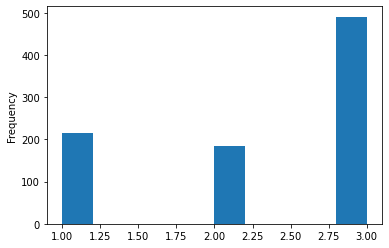

In [ ]:
df['Pclass'].plot(kind='hist')

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

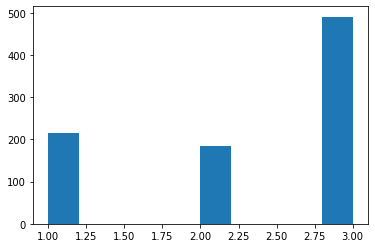

In [ ]:
plt.hist(df['Pclass'])

(array([216., 184., 491.]),
 array([1., 2., 3., 4.]),
 <a list of 3 Patch objects>)

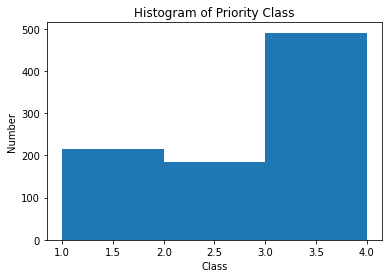

In [ ]:
fig = plt.subplot()
plt.title("Histogram of Priority Class")
plt.xlabel("Class")
plt.ylabel("Number")
plt.hist(df['Pclass'],3,range=[1,4])


I would like to graph the x axis using the English name of the priority class

In [ ]:
dictionary = {1:'First', 2:'Second', 3:'Third'}

In [ ]:
Priority = df['Pclass'].map(dictionary)
Priority

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: Pclass, Length: 891, dtype: object

(array([491.,   0.,   0.,   0.,   0., 216.,   0.,   0.,   0., 184.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

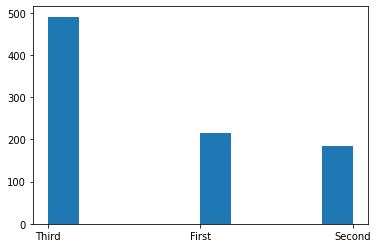

In [ ]:
plt.hist(Priority)

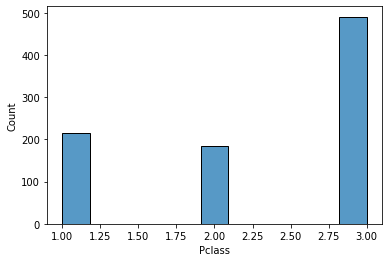

In [ ]:
sns.histplot(df,x='Pclass')

[Text(0, 0.5, 'Number'),
 Text(0.5, 0, 'Priority Class'),
 Text(0.5, 1.0, 'Histogram of Priority Class')]

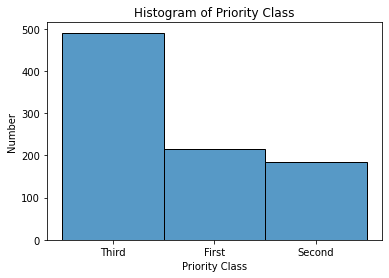

In [ ]:
sns.histplot(Priority).set(xlabel='Priority Class',ylabel='Number',title="Histogram of Priority Class")

Now I wish to look at the distribution of age. We can use the histogram or distribution plot.

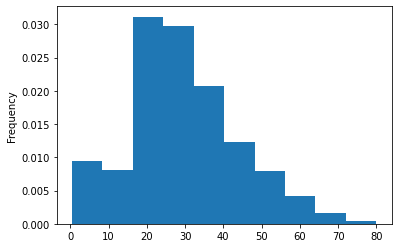

In [ ]:
df['Age'].dropna().plot(kind='hist',density=True)

This distribution makes sense as I would expect more old people to be on a cruise than the other way around.

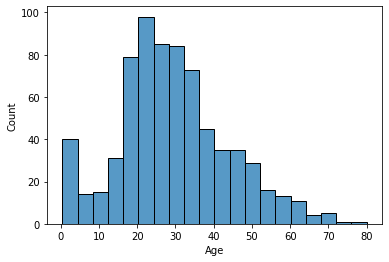

In [ ]:
sns.histplot(df['Age'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 80.0)]

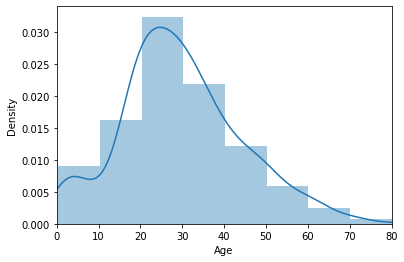

In [ ]:
plot = sns.distplot(df['Age'].dropna(),bins=8)
plot.set(xlim=(0,80))

I currently have a theory. It seems to me that people of a higher priority class should have an equal rate of survival as people in lower classes because money should not buy an individual anything at the expense of others. I'm going to visualize this for myself and look at the number of people who live and die based off their priority class.

In [ ]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = df.dropna(subset=['Age'])

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df['Priority Class'] = df.loc[:,('Pclass')].map(dictionary)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Priority Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Third
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Second
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,First
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,First


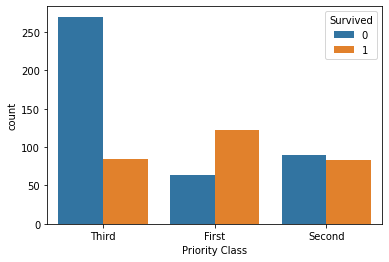

In [ ]:
sns.countplot(x='Priority Class',data=df,hue='Survived')

Looks like I was definitely wrong. However, it was very fruitful to have the data prove this to me.